# Twitter Sentiment Analysis 

In [24]:
import tweepy
import pandas as pd

Task: Extract the data from twitter using api key

Data Collection & Data Cleaning

Extracted 5000 covid related tweets to perform sentiment analysis 

In [5]:
API_key = "AAAAAAAAAAAAAAAAAAAAAAPnkAEAAAAAq58sFbQk92ueDNbpJeIoR%2FkZaMc%3D3Hgy8qJzLcVkebXZZTbFBWlWzLZ9fqhYs20sQG9RnbCp3T0qYo"

client = tweepy.Client(API_key)

query = "covid"
response = client.search_recent_tweets(query)

file=open('tweets.txt','w', newline='')
for tweet in tweepy.Paginator(client.search_recent_tweets, query=query, max_results=100).flatten(limit=5000):
    item = tweet.text.strip().replace('\n', ' ')
    file.write(item + '\n')
    

Count the 10 words that appear most frequently in these tweets and print them in reverse order of frequency

In [6]:
import re

file_name = open('tweets.txt')

def freq_count(file):
    dict_count = {}
    for line in file:
        for word in line.split():
              dict_count[word] = dict_count.get(word, 0) +1
    
    tmp_list = []
    for (key, val) in dict_count.items():
        tmp_list.append((val,key))

    sorted_list = sorted(tmp_list, reverse = True)

    for item in sorted_list[:10]:
        print(item[1], item[0])
        
freq_count(file_name)

file_name.close()

RT 3881
the 3056
of 1862
to 1681
a 1429
and 1263
in 981
COVID 898
is 892
Covid 849


Report what hashtags are used the tweets, including the number of times all hashtags appear in these tweets. (hint: you can use a regular expression to identify hashtags OR look for words which start with a #)

In [7]:
file_name = open('tweets.txt')

def hastags(file):
    dict_count = {}
    for line in file:
        for word in line.split():
              if word.startswith('#'):
                    dict_count[word] = dict_count.get(word, 0) +1
        
    tmp_list = []
    for (key, val) in dict_count.items():
        tmp_list.append((val,key))
    
    sorted_list = sorted(tmp_list, reverse = True)

    for item in sorted_list[:]:
        print(item[1], item[0])

hastags(file_name)
file_name.close()   
      


#COVID 55
# 44
#JornadaDeVacunación💉| 20
#COVID19 20
#ENTÉRATE📢| 19
#GMVVMetaCumplida 17
#covid 15
#TwitterFiles 15
#DiedSuddendly 12
#Covid_19 12
#diedsuddenly 9
#ToriesOut175 8
#ToriesCostLives 8
#Italia 8
#Covid 8
#China 8
#pandemic 7
#โหนกระแส 6
#MIRONEWS 6
#GMVVM… 6
#Vaccines 5
#ExtensiónBecas 5
#ExposeFauci 5
#Covid. 5
#COVID-19 5
#CCP 5
#BREAKING: 5
#… 4
#vaccines 4
#tcot 4
#chinacovid 4
#Pfizer 4
#CovidIsntOver 4
#Covid19 4
#COVIDIsAirborne 4
#COVID-19, 4
#Brasil 4
#AméricaLatina 4
#ATENCIÓN 4
#29Dic| 4
#smalldickenergy 3
#incorvassi 3
#commissionedinchiesta 3
#WHO 3
#WEFpuppets 3
#ToryCorruption 3
#SistemaPatria 3
#Salud 3
#SARSCoV2. 3
#Parlamento 3
#LongCovid 3
#FauciFiles 3
#DiedSuddenlyNews 3
#CovidIsNotOver 3
#Coronavirus 3
#China! 3
#CarnetDeLaPatria 3
#COVID_19 3
#COVID, 3
#Abdala 3
#29Dic 3
#1 3
#waanjais 2
#vacunación 2
#twitchaffiliate 2
#twitch 2
#smallstreamer 2
#opportunity 2
#oil 2
#mewsuppasit 2
#mewlions 2
#mewgulf 2
#jobs 2
#jjjjommm 2
#hiring 2
#energy 2
#covi

Identifies how many of the tweets are retweets (retweets on twitter start with “RT @“) (hint: you can use a regular expression for this. What is the regular expression that matches the beginning of a string?)


In [8]:
file_name = open('tweets.txt')
def retweets(file):
    total_tweets = 0
    retweet_count = 0
    for line in file:
        total_tweets = total_tweets+1
        if re.findall('^RT @', line):
             retweet_count = retweet_count+1
      
    print('{} out of {} tweets are retweets'.format(retweet_count, total_tweets))

retweets(file_name)
      
file_name.close()

3861 out of 4979 tweets are retweets


Identifies the 10 accounts which were retweeted the most

In [9]:
file_name = open('tweets.txt')

def retweet_count(file):
    list = []
    for line in file:
        if re.findall('^RT @', line):
            list.append(line)
        
    newlst = []
    for tweet in list:
        y = re.findall('^[^:]*:\s*', tweet)    
        newlst.append(y)
    
    list = []
    for account in newlst:
        for item in account:
            item = item.strip().replace(':', "")
            acc = item.split(" ", 1)
            list.append(acc[1])
  
    dict_count = {}
    for word in list:
        dict_count[word] = dict_count.get(word, 0) +1

    tmp_list = []
    for (key, val) in dict_count.items():
        tmp_list.append((val,key))
    
    sorted_list = sorted(tmp_list, reverse = True)

    for item in sorted_list[:10]:
        print(item[1], item[0])

retweet_count(file_name)

file_name.close()


@RandPaul 165
@DrAseemMalhotra 102
@RWMaloneMD 100
@JoyceWhiteVance 68
@RepThomasMassie 59
@RX_forLiberty 58
@choquei 56
@VTVcanal8 54
@AmitAryaMD 47
@MartinKulldorff 41


In [10]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Identify how many of these tweets are talking about the vaccine (you can use the keyword “vaccine” to look for tweets talking about the vaccine)

In [11]:
file_name = open('tweets.txt')

def vaccine_tweet(file):
    total_tweets = 0
    vaccine_tweet_count = 0
    for line in file:
        total_tweets = total_tweets+1
        if 'vaccine' in line:
            vaccine_tweet_count = vaccine_tweet_count+1
    print('{} out of {} tweets are retweets'.format(vaccine_tweet_count, total_tweets))

vaccine_tweet(file_name)

file_name.close()

493 out of 4979 tweets are retweets


In [12]:
file_name = open('tweets.txt')

def get_sentiment(file):
    total_tweets = 0
    try:
        analyzer = SentimentIntensityAnalyzer()
        for line in file:
            total_tweets = total_tweets+1
            vs = analyzer.polarity_scores(line)
            return(vs['compound'])
    except:
        return -1

print('The average sentiment of the 5,000 tweets is',get_sentiment(file_name))

file_name.close()

The average sentiment of the 5,000 tweets is 0.3337


In [13]:
import nltk
nltk.download('vader_lexicon')
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dwishamehta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [71]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/dwishamehta/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [42]:
colnames=['tweets'] 
tweet_list = pd.read_csv('tweets.txt', sep= '\n',names=colnames, header=None)

In [43]:
tweet_list

,tweets
0,@JebraFaushay @genxsixtynine What a cruel thin...
1,COVID really fucking my ass UP rn https://t.co...
2,"RT @zoeharcombe: Here we are, 3 years on, with..."
3,@organichemusic 800 mg safe ...for children? ...
4,補充一下： 法國開放大陸人嚟法國旅遊其實好現實： 1. 法國經濟靠旅遊業，尤其依家俄烏戰爭更...
...,...
4969,RT @DaAcervo: Mentiram para nós Eles continua...
4970,RT @Aliyah01150546: 🇨🇳 Chine : Un chauffeur r...
4971,"The results, published in the New England Jou..."
4972,RT @DC_Draino: COVID is a bioweapon Fauci and...


In [44]:
tweet_list.drop_duplicates(inplace = True)

In [78]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet
    

tweet_list['tweet_clean'] = tweet_list['tweets'].apply(cleaner)

In [79]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

list1 = []
for i in tweet_list['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dwishamehta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
tweet_list['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

tweet_list['sentiment_category'] = tweet_list['sentiment'].apply(sentiment_category)

In [82]:
tweet_list

,tweets,text,tweet_clean,sentiment,sentiment_category
0,What a cruel thing to say when more of the are...,@JebraFaushay @genxsixtynine What a cruel thin...,What a cruel thing to say when more of the are...,-0.7379,negative
1,COVID really my ass UP,COVID really fucking my ass UP rn https://t.co...,COVID really my ass UP,-0.5829,negative
2,": Here we are , 3 on , with high Covid in Chin...","RT @zoeharcombe: Here we are, 3 years on, with...",": Here we are , 3 on , with high Covid in Chin...",0.0000,neutral
3,800 safe ... for ? Temporarily ? How long ? I ...,@organichemusic 800 mg safe ...for children? ...,800 safe ... for ? Temporarily ? How long ? I ...,0.6523,positive
4,： ： 1 . ， $ 2 . ， ， 所以好少航班來自中國相比2019 3 . ， ，,補充一下： 法國開放大陸人嚟法國旅遊其實好現實： 1. 法國經濟靠旅遊業，尤其依家俄烏戰爭更...,： ： 1 . ， $ 2 . ， ， 所以好少航班來自中國相比2019 3 . ， ，,0.0000,neutral
...,...,...,...,...,...
4966,7 Long before covid we public health to wear ....,@TrishtheDish_7 @EBHarrington @vixenvalentino ...,7 Long before covid we public health to wear ....,NaN,negative
4967,747 : We have gone through a number of due to ...,RT @Johnson_747: We have gone through a number...,747 : We have gone through a number of due to ...,NaN,negative
4968,I lost a good childhood friend during covid . ...,I lost a good childhood friend during covid. G...,I lost a good childhood friend during covid . ...,NaN,negative
4970,: 🇨🇳 Chine : Un chauffeur s ' sur bord d ' rou...,RT @Aliyah01150546: 🇨🇳 Chine : Un chauffeur r...,: 🇨🇳 Chine : Un chauffeur s ' sur bord d ' rou...,NaN,negative


In [100]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
pc = count_values_in_column(tweet_list,'sentiment_category')

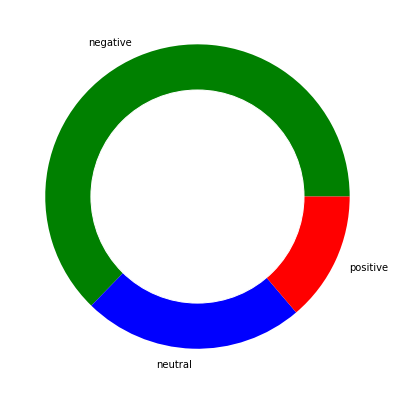

In [102]:
pichart = count_values_in_column(tweet_list,'sentiment_category')
names= pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
fig = plt.figure(figsize =(10, 7))
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()